# ASE Basic

Pythonで原子シミュレーションを進めていく際に便利なOSSライブラリとして、Atomic Simulation Environment: ASEがあります。<br/>
本章ではASEの基本的な使い方を紹介していきます。

 - Documentation: https://wiki.fysik.dtu.dk/ase/
 - gitlab: https://gitlab.com/ase/ase

## Atomsについて

ASEでは原子が複数個集まって作られる系を `Atoms` クラスで表現します。

 - https://wiki.fysik.dtu.dk/ase/ase/atoms.html

`Atoms`クラスは前章で説明した、原子シミュレーションに必要な構造を表現するための以下のような`attribute`(変数)を保持しています。
 - 各原子の元素種類
 - 座標値
 - 速度(運動量)
 - セル
 - 周期境界条件など

### Atomsの作成方法： 原子種・座標を直接指定

`Atoms`を作るための一番原始的な方法として、原子種とその座標値を直接指定する方法があります。<br/>
以下は、1つめのHがxyz座標値 `[0, 0, 0]`、2つめのHがxyz座標値 `[1.0, 0, 0]` に存在する水素分子H2を作る例です。

In [1]:
from ase import Atoms

atoms = Atoms("H2", [[0, 0, 0], [1.0, 0, 0]])

原子の可視化を行うこともできます。
ここでは、ASEのview 関数を用い、`nglviewer`というライブラリを用いて可視化を行っています。

`nglviewer` を用いると、３次元の原子構造を表示しながら、マウスでインタラクティブに操作することもできます。

可視化についての詳細は[Appendix_1_visualization.ipynb](./Appendix_1_visualization.ipynb)をご参照ください。

In [2]:
from ase.visualize import view
from pfcc_extras.visualize.view import view_ngl

#view(atoms, viewer="ngl")
view_ngl(atoms, representations=["ball+stick"], w=400, h=300)

以下のように、ASEを用いてpng静止画を描画することも可能です。

In [3]:
from ase.io import write
from IPython.display import Image

write("output/H2O.png", atoms, rotation="0x,0y,0z", scale=100)
Image(url='output/H2O.png', width=150)

以下は上記のプログラムを１行でできるようにした便利関数です。今後はこれを用います。

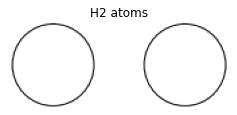

In [4]:
from pfcc_extras.visualize.ase import view_ase_atoms

view_ase_atoms(atoms, figsize=(4, 4), title="H2 atoms", scale=100)

元素記号 `symbols`の代わりに、原子番号を`numbers` として指定することも可能です。

In [5]:
co_atoms = Atoms(numbers=[6, 8], positions=[[0, 0, 0], [1.0, 0, 0]])
view_ngl(co_atoms, representations=["ball+stick"], w=400, h=300)

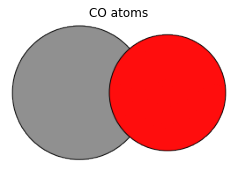

In [6]:
view_ase_atoms(co_atoms, figsize=(4, 4), title="CO atoms", scale=100)

周期境界条件を含む系を定義したい場合は、`cell` に周期情報を指定し、`pbc` にa軸b軸c軸それぞれに対して周期境界条件を適用するかどうかのON/OFFを指定することができます。

In [7]:
from ase import Atoms


na2_atoms = Atoms(
    symbols="Na2",
    positions=[[0, 0, 0], [2.115, 2.115, 2.115]],
    cell=[4.23, 4.23, 4.23],
    pbc=[True, True, True]
)

In [8]:
view_ngl(na2_atoms, w=400, h=300)

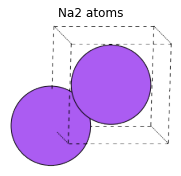

In [9]:
view_ase_atoms(na2_atoms, rotation="10x,10y,0z", figsize=(3, 3), title="Na2 atoms", scale=30)

### Atomsの持つattribute, method

<figure style="width:200px">
<img src="../assets/atoms.png"/>
</figure>

`atoms` はその系の情報を保持しており、Attribute や `get_XXX` 関数を通して参照することができます。

Attributeとは Atomsクラスの持つ変数のことで、 `atoms.xxx` と直接参照することが出来るものもあります。<br/>
関数を通してアクセスできる情報もあります。

以下は主要なAttributeや関数の返り値(numpy array としてのshapeがどの様になっているか)をまとめたものです。

 - Attribute
   - `symbols`: 元素種とその数をまとめたものを返す
   - `numbers`: 原子番号のarray。shapeは(N,)
   - `positions`: 各原子の座標値を示す。shapeは(N, 3)。 3はxyz座標を表す。
   - `cell`: ASEのCellをあつかうCellクラスで表現される。
     - Cellクラスに関して詳しくは後述する。[三斜晶系](https://ja.wikipedia.org/wiki/%E4%B8%89%E6%96%9C%E6%99%B6%E7%B3%BB)など一般的にはa, b, c軸のベクトルをそれぞれ表す(3, 3) の行列で表されるが、[直方晶](https://ja.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E6%99%B6%E7%B3%BB)の場合はa, b, c軸の長さのみが(3,) で表現される。
   - `pbc`: 各方向に周期境界条件(Periodic Boundary Condition) があるかどうかを示す。
 - 関数
   - `get_masses()`: 各原子の質量を返す。
   - `get_momenta()`: 各原子に設定されている運動量を返す。
   - `len(atoms)`: Atoms全体の原子数`N`を返す。

In [10]:
print(f"symbols  : {atoms.symbols}")
print(f"positions: {atoms.positions}")
print(f"cell     : {atoms.cell}")
print(f"pbc      : {atoms.pbc}")

# Atomic numbers やMass はSymbolが指定されていれば自動で計算されます。
print(f"numbers  : {atoms.numbers}")
print(f"massess  : {atoms.get_masses()}")
print(f"momenta  : {atoms.get_momenta()}")
print(f"Numbers of atoms  : {len(atoms)}")

symbols  : H2
positions: [[0. 0. 0.]
 [1. 0. 0.]]
cell     : Cell([0.0, 0.0, 0.0])
pbc      : [False False False]
numbers  : [1 1]
massess  : [1.008 1.008]
momenta  : [[0. 0. 0.]
 [0. 0. 0.]]
Numbers of atoms  : 2


### 単位系

ASEでは、エネルギーの単位はeV (約$1.602 \times 10^{-19}$ J)、座標系の単位はÅ ($1 \times 10^{-10}$ m)で扱われる事が多いです。<br/>
力や応力の単位はこれらの複合単位で、力についてはeV/Å、応力についてはeV/Å2です。chargeの単位は電荷素量です。

 - eV: [電子ボルト](https://ja.wikipedia.org/wiki/%E9%9B%BB%E5%AD%90%E3%83%9C%E3%83%AB%E3%83%88)
 - Å: [オングストローム](https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%B3%E3%82%B0%E3%82%B9%E3%83%88%E3%83%AD%E3%83%BC%E3%83%A0)
 - e: [電気素量](https://ja.wikipedia.org/wiki/%E9%9B%BB%E6%B0%97%E7%B4%A0%E9%87%8F)

[Tips] Jupyter 上で各クラス・関数のより詳細な情報を知りたい場合、　? を後ろにつけることでドキュメントの表示ができます。

In [11]:
Atoms?

Init signature:
Atoms(
    symbols=None,
    positions=None,
    numbers=None,
    tags=None,
    momenta=None,
    masses=None,
    magmoms=None,
    charges=None,
    scaled_positions=None,
    cell=None,
    pbc=None,
    celldisp=None,
    constraint=None,
    calculator=None,
    info=None,
    velocities=None,
)
Docstring:     
Atoms object.

The Atoms object can represent an isolated molecule, or a
periodically repeated structure.  It has a unit cell and
there may be periodic boundary conditions along any of the three
unit cell axes.
Information about the atoms (atomic numbers and position) is
stored in ndarrays.  Optionally, there can be information about
tags, momenta, masses, magnetic moments and charges.

In order to calculate energies, forces and stresses, a calculator
object has to attached to the atoms object.

Parameters:

symbols: str (formula) or list of str
    Can be a string formula, a list of symbols or a list of
    Atom objects.  Examples: 'H2O', 'COPt12', ['H', 

## 構造生成の方法

前節で説明した、直接 `Atoms` に座標値を指定する方法は、１つ１つの原子位置を細かく設定したい場合には良いですが、
通常使う場合には各原子の座標値を明示的に調べて設定する必要があり、大変です。

ASEでは、いろいろな構造を作成するための関数がすでに定義されており、これらを用いると簡単に構造を作成することができます。
 - https://wiki.fysik.dtu.dk/ase/ase/build/build.html
 
### ASE molecule

`molecule` methodはASEで登録済みの有機分子を作成することができます。<br/>
登録済みの名前リストは以下のように見ることができます。

In [12]:
from ase.build import molecule
from ase.collections import g2

print(f"Available molecule:", len(g2.names), g2.names)

Available molecule: 162 ['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '

以下のように文字列を指定するだけで atomsの作成ができます。

In [13]:
ch3cho_atoms = molecule("CH3CHO")
view_ngl(ch3cho_atoms, representations=["ball+stick"], w=400, h=300)

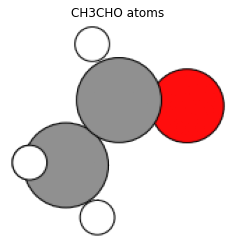

In [14]:
view_ase_atoms(ch3cho_atoms, rotation="0x,0y,0z", figsize=(4, 4), title="CH3CHO atoms", scale=40)

### ASE bulk

`bulk` methodは結晶構造を簡単に作ることができます。

以下のように、結晶を特徴づける値を指定することでその結晶構造が生成されます。
 - `name`: 原子種
 - `crystalstructure`: "sc", "fcc", "bcc" などの結晶構造を指定
 - `a, b, c, alpha, covera`: Cellの形や大きさを指定
 - `cubic`: Cellの形をCubic unit cell にするか否か


In [15]:
from ase.build import bulk

fe_sc_atoms = bulk(name="Fe", crystalstructure="sc", a=2.0)
fe_sc_atoms

Atoms(symbols='Fe', pbc=True, cell=[2.0, 2.0, 2.0])

次の可視化では１原子しか表示されていません。ズームアウトして、全体を見てみると、黄色い枠で**セル**が表示されていることがわかります。

In [16]:
view_ngl(fe_sc_atoms, w=400, h=300)

詳しくは後述しますが、セルと周期境界条件(`pbc`)が与えられた場合、上記の構造は周期境界条件に従って無限に続いているような構造を考えます。<br/>
つまり表示上は１原子しか表示されていませんが、以下の構造のように規則正しく構造が続いて配置されている結晶構造を表しています。

In [17]:
view_ngl(fe_sc_atoms * (6, 6, 6), w=400, h=300)

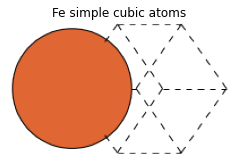

In [18]:
view_ase_atoms(fe_sc_atoms, rotation="45x,45y,0z", figsize=(4, 4), title="Fe simple cubic atoms", scale=40)

`crystalstructure`やCell size `a` などを指定しなかった場合、ASEが[元素種から自動で最適なものを決定します](https://gitlab.com/ase/ase/-/blob/6cb8784ac1056b7b897822ff7b763a323d92a543/ase/data/__init__.py#L578)。

例えば、Feの場合 `a=2.87`のBCC構造となります。

In [19]:
fe_atoms = bulk("Fe")
fe_atoms

Atoms(symbols='Fe', pbc=True, cell=[[-1.435, 1.435, 1.435], [1.435, -1.435, 1.435], [1.435, 1.435, -1.435]])

In [20]:
view_ngl(fe_atoms, w=400, h=300)

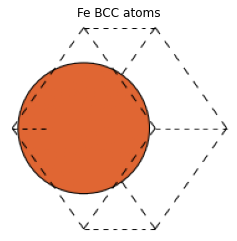

In [21]:
view_ase_atoms(fe_atoms, rotation="45x,0y,0z", figsize=(4, 4), title="Fe BCC atoms", scale=40)

上記のように、BCCやFCC構造の場合、原子を1つのみ含む単位格子(unit cell)である基本単位胞(primitive cell)のCellは立方体ではありませんが、単位格子を拡張してとることにより立方体の形にすることも可能です。 `cubic=True` の引数を設定することで立方体の格子を持つ Atomsが生成できます。

これらのPrimitive Cellと立方体のCellをもつUnit Cellの違いは、以下の文献が参考になります。

 - [結晶回折学　講義資料 担当教員　高村　仁: 単位胞のとり方](https://ceram.material.tohoku.ac.jp/~takamura/class/crystal/node3.html)

In [22]:
fe_cubic_atoms = bulk("Fe", cubic=True)
fe_cubic_atoms

Atoms(symbols='Fe2', pbc=True, cell=[2.87, 2.87, 2.87])

In [23]:
view_ngl(fe_cubic_atoms, w=400, h=300)

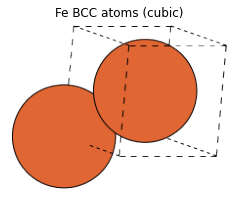

In [24]:
view_ase_atoms(fe_cubic_atoms, rotation="10x,30y,0z", figsize=(4, 4), title="Fe BCC atoms (cubic)", scale=40)

**repeat関数**

周期境界条件を持つ構造は `repeat` 関数を使うことで、周期を繰り返しSuper cellとすることができます。

以下の例では a軸方向に２倍、 b軸方向に3倍、 c軸方向に4倍、の大きさのCellの原子構造を作成しています。

In [25]:
fe222_atoms = fe_atoms.repeat((2, 3, 4))
view_ngl(fe222_atoms, w=400, h=300)

`repeat`関数の代わりに、掛け算で指定することもできます。

In [26]:
fe222_atoms = fe_atoms * (2, 3, 4)
view_ngl(fe222_atoms, w=400, h=300)

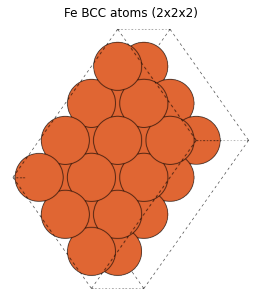

In [27]:
view_ase_atoms(fe222_atoms, rotation="45x,0y,0z", figsize=(5, 5), title="Fe BCC atoms (2x2x2)", scale=30)

このように周期境界条件に従って無限に続くことを考えると、`cubic`を指定せずにprimitive cellで表現されたFe構造と、`cubic=True`としてセルを立方体にとったUnit cellのFe構造が同じ構造を表していることを確認することができます。

また bulk methodは2元素からなる構造なども生成することができます。

In [28]:
nacl_atoms = bulk("NaCl", crystalstructure="rocksalt", a=2.0)
view_ngl(nacl_atoms * (3, 3, 3), w=400, h=300)

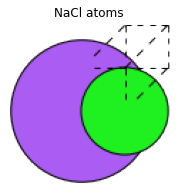

In [29]:
view_ase_atoms(nacl_atoms, rotation="0x,0y,0z", figsize=(3, 3), title="NaCl atoms", scale=30)

### ASE 表面構造

触媒との反応を扱う場合などは、金属結晶の表面に対して反応物がどのように振る舞うかを見る形でモデリングを行う場合があります。<br/>
結晶の表面を[ミラー指数](https://ja.wikipedia.org/wiki/%E3%83%9F%E3%83%A9%E3%83%BC%E6%8C%87%E6%95%B0)で指定することができます。

ASEでは主要な結晶構造に対する、各表面を指定されたミラー指数で切り出されたものを作成することができます。表面はz軸方向に作られます。<br/>
このような表面がでている構造を Slab構造と呼びます。

Slab構造の作成時には以下のようなパラメータを指定します。

 - `symbol`: 元素種を指定
 - `size`: x, y, z軸それぞれの方向への原子数を指定
 - `vacuum`:　z軸上下に作成する真空層の厚さを指定

In [30]:
from ase.build import (
    fcc100, fcc110, fcc111, fcc211, fcc111_root,
    bcc100, bcc110, bcc111, bcc111_root,
    hcp0001, hcp10m10, hcp0001_root,
    diamond100, diamond111
)

# fcc: fcc100(), fcc110(), fcc111(), fcc211(), fcc111_root()
# bcc: bcc100(), bcc110(), bcc111() * - bcc111_root()
# hcp: hcp0001(), hcp10m10(), hcp0001_root()
# diamond: diamond100(), diamond111()

pt100_atoms = fcc100("Pt", size=(4, 5, 6), vacuum=10.0)

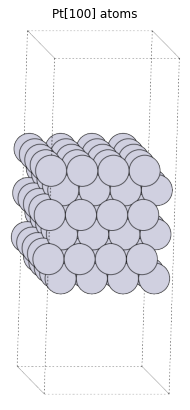

In [31]:
view_ase_atoms(pt100_atoms, rotation="-80x,10y,0z", figsize=(7.0, 7.0), title="Pt[100] atoms", scale=20)

In [32]:
fcc100?

Signature: fcc100(symbol, size, a=None, vacuum=None, orthogonal=True, periodic=False)
Docstring:
FCC(100) surface.

Supported special adsorption sites: 'ontop', 'bridge', 'hollow'.
File:      ~/.local/lib/python3.7/site-packages/ase/build/surface.py
Type:      function


しばしば表面の片方に注目して解析を行いますが、その場合であっても、反対側にももう1つの表面が出ることに注意してください。通常は反対側の表面の影響を受けないよう、ある程度の厚みをもたせて(この例では6層)解析を行います。

### SMILESからの生成

有機分子を表す際には、[SMILES記法](https://ja.wikipedia.org/wiki/SMILES%E8%A8%98%E6%B3%95)を用いて、特定の分子を表すことも多いです。<br/>
例えばエチレンは "C=C" で表すことができます。

以下の関数は、内部で有機分子を扱うライブラリである [RDKit](https://www.rdkit.org/) を使用して、SMILES構造からのAtoms生成を行っています。



In [33]:
from pfcc_extras.structure.ase_rdkit_converter import smiles_to_atoms, atoms_to_smiles

atoms = smiles_to_atoms("C=C")
view_ngl(atoms, representations=["ball+stick"], w=400, h=300)

atomsからSMILESに戻す事もできます。(Experimentalな機能で、正しく動かない場合もありますのでご注意ください)

In [34]:
atoms_to_smiles(atoms)

'C=C'

### ファイルから読み込む

ASEでは、 xyz, cif, VASPのPOSCARファイルなどなど、様々な原子構造を記述するファイルの書き込み・読み込みに対応しています。<br/>
対応しているファイルの一覧は以下のドキュメントを参照ください。

 - https://wiki.fysik.dtu.dk/ase/ase/io/io.html

In [35]:
from ase.io import read, write

# 書き込み
write("output/na2.xyz", na2_atoms)

In [36]:
# 読み込み
read("output/na2.xyz")

Atoms(symbols='Na2', pbc=True, cell=[4.23, 4.23, 4.23])

### 外部データベースを使用する

 - Materials Project: https://materialsproject.org/
 - PubChem: https://pubchem.ncbi.nlm.nih.gov/

などといった世の中に存在する大規模データベースから、ファイルをダウンロードし構造を読み込んでくることも可能です。

これらファイルを使用する方法はMatlantis製品内のExampleに乗せておりますので、そちらをご覧ください。